<a href="https://colab.research.google.com/github/kyanimin/DataScience/blob/main/%EC%8B%A4%EC%8A%B5_06_14_2021_%EA%B7%B8%EB%9E%98%ED%94%84_%EA%B7%B8%EB%A6%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) 히스토그램을 활용한 최고기온, 최저 기온, 평균기온 분포 확인하기


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


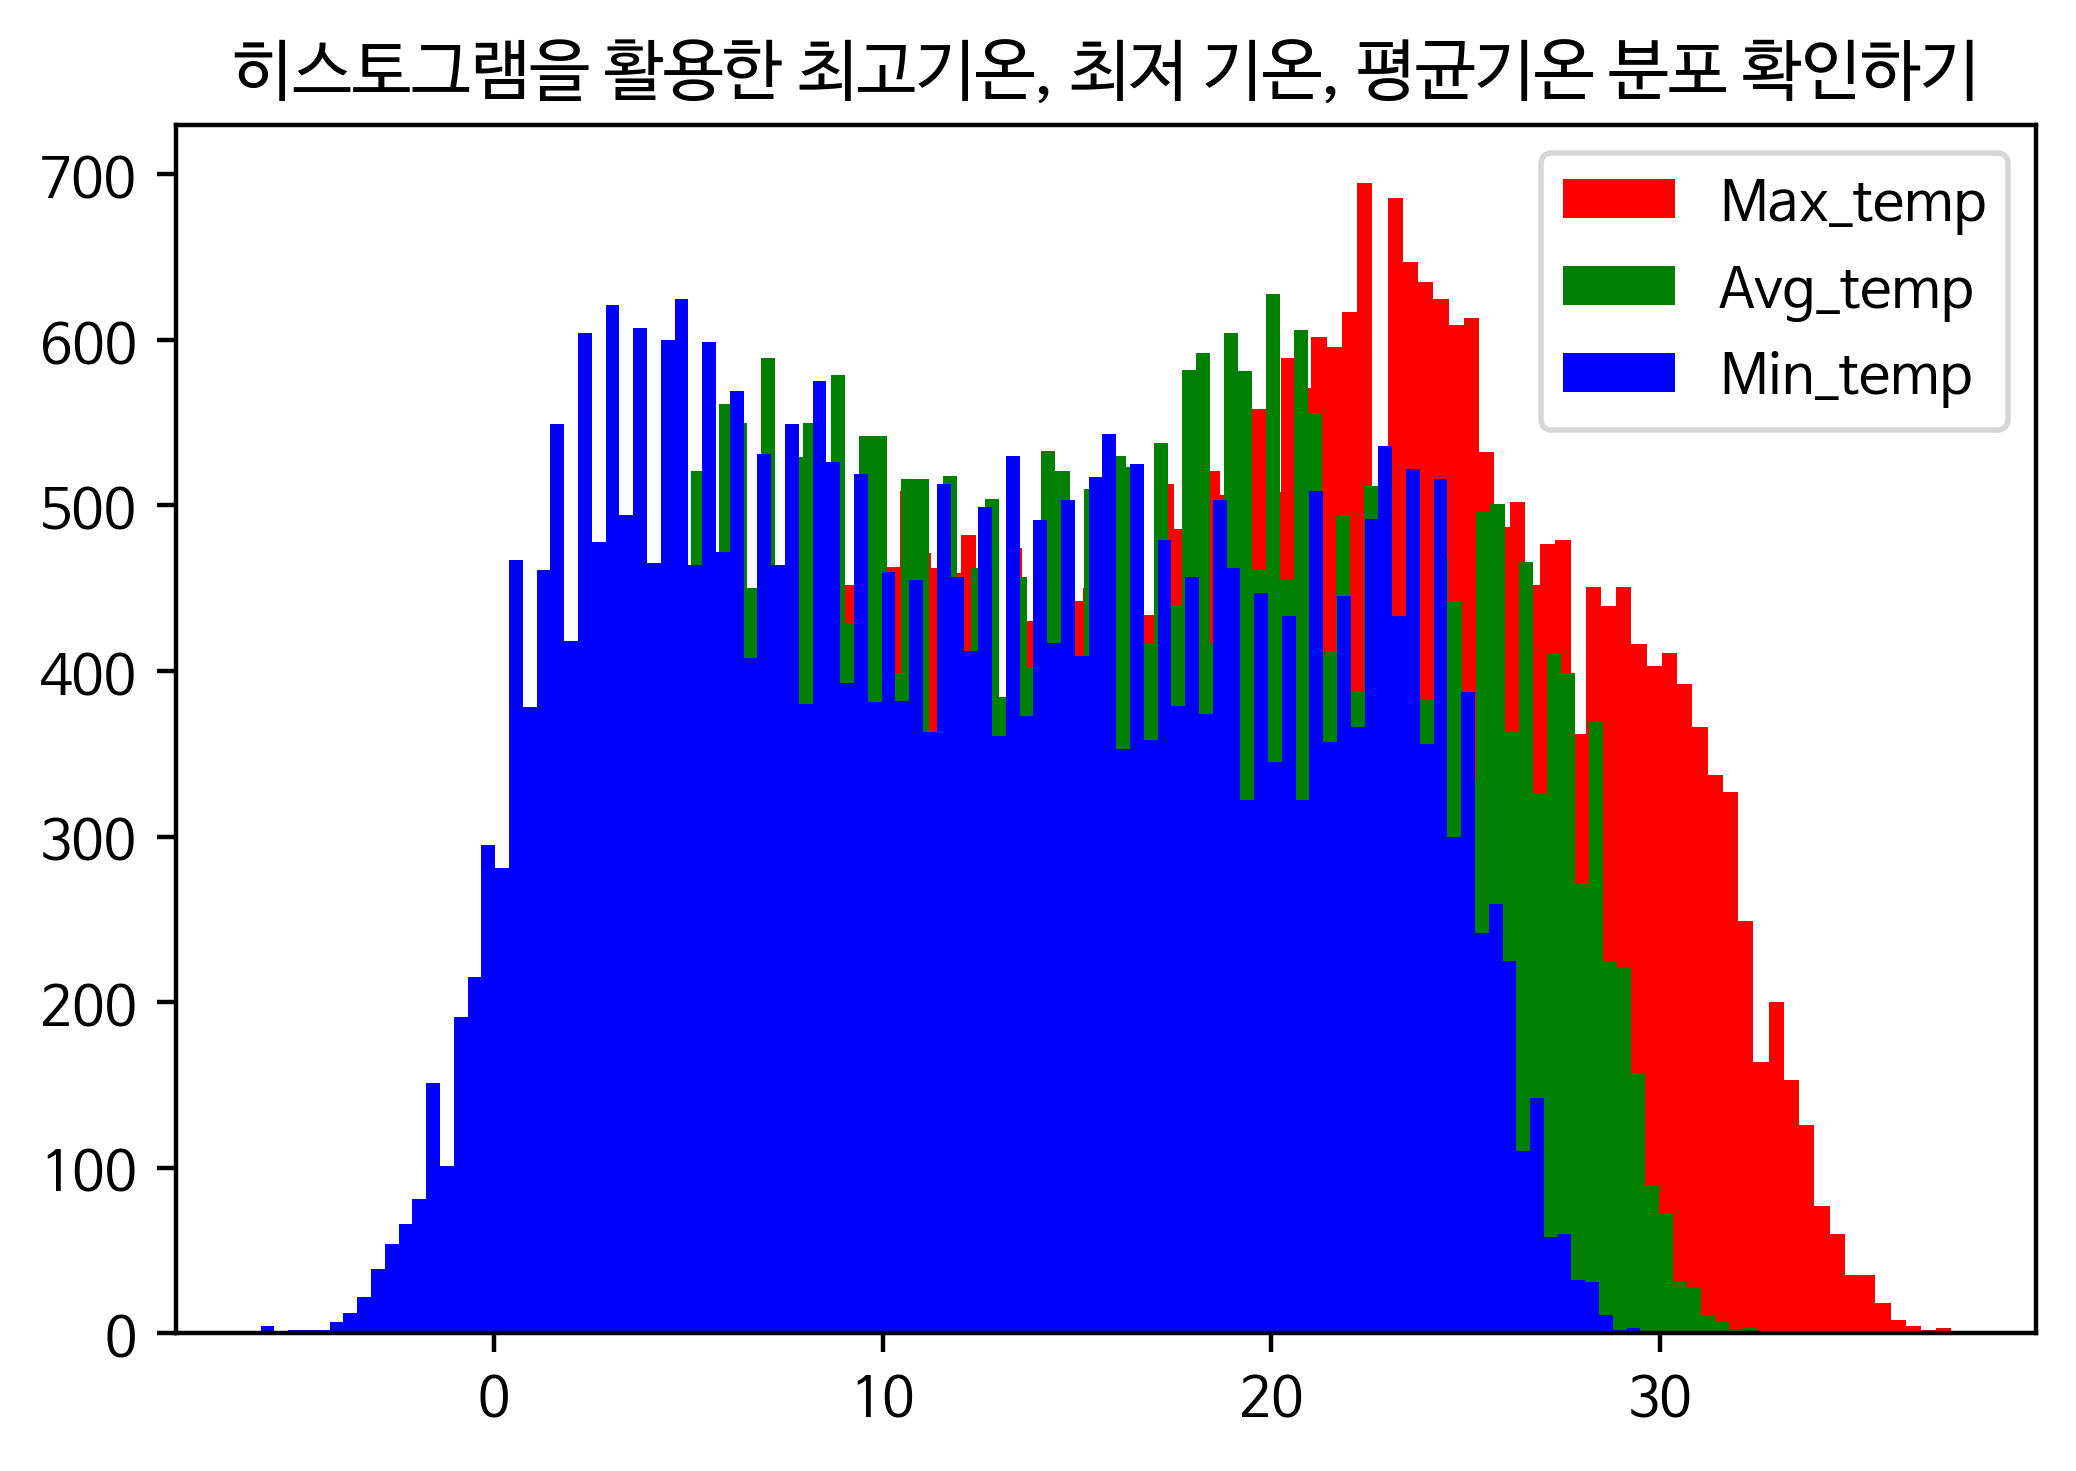

In [ ]:
import csv

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
# fileRead
f= open("/content/jeju.csv", 'r', encoding='CP949')
data = csv.reader(f)
header = next(data)

max_temp = [] #최고 기온을 담을 리스트 변수 선언
avg_temp = [] #평균 기온을 담을 리스트 변수 선언
min_temp = [] #최저 기온을 담을 라스트 변수 선언

# 데이터 가공
for row in data:
  if row[-1] != '':  #최고 기온 데이터 값이 존재하면(결측치 제외)
    max_temp.append(float(row[-1]))
  if row[-2] != '':  #최저 기온 데이터 값이 존재하면(결측치 제외)
    min_temp.append(float(row[-2]))
  if row[-3] != '':  #평균 기온 데이터 값이 존재하면(결측치 제외)
    avg_temp.append(float(row[-3]))

    

plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.hist(max_temp, bins= 100, color= 'r', label = 'Max_temp')
plt.hist(avg_temp, bins= 100, color= 'g', label = 'Avg_temp')
plt.hist(min_temp, bins= 100, color= 'b', label = 'Min_temp')
plt.title("히스토그램을 활용한 최고기온, 최저 기온, 평균기온 분포 확인하기")
plt.legend()
plt.show()

2) 상자그림을 활용한 최고 기온 vs 서울 최고 기온


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


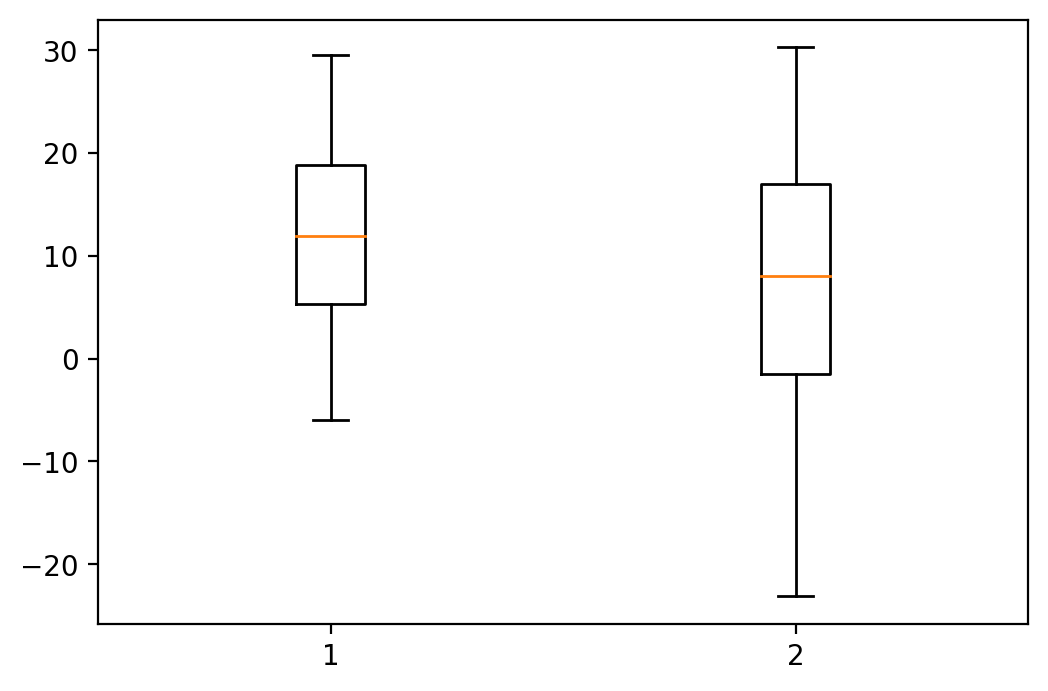

In [ ]:
import csv
import matplotlib.pyplot as plt


f = open('/content/jeju.csv', encoding = 'cp949')
f2 = open('/content/seoul.csv', encoding = 'cp949')
data = csv.reader(f)
data2 = csv.reader(f2)
next(data) #헤더
next(data2)

seoul_max = [] #서울 최고 기온을 담을 리스트 변수 선언
jeju_max = [] #제주 최고 기온을 담을 리스트 변수 선언

for row in data:
  if row[-2] != '':  #최고 기온 데이터 값이 존재하면(결측치 제외)
    seoul_max.append(float(row[-2]))
for row in data2:
  if row[-2] != '':  #최저 기온 데이터 값이 존재하면(결측치 제외)
    jeju_max.append(float(row[-2]))

plt.figure(dpi=200)
plt.boxplot([seoul_max,jeju_max]) #2개의 그래프를 그릴 수 있음
plt.show()

3) 월별 최고기온 상자 그림 그리기


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


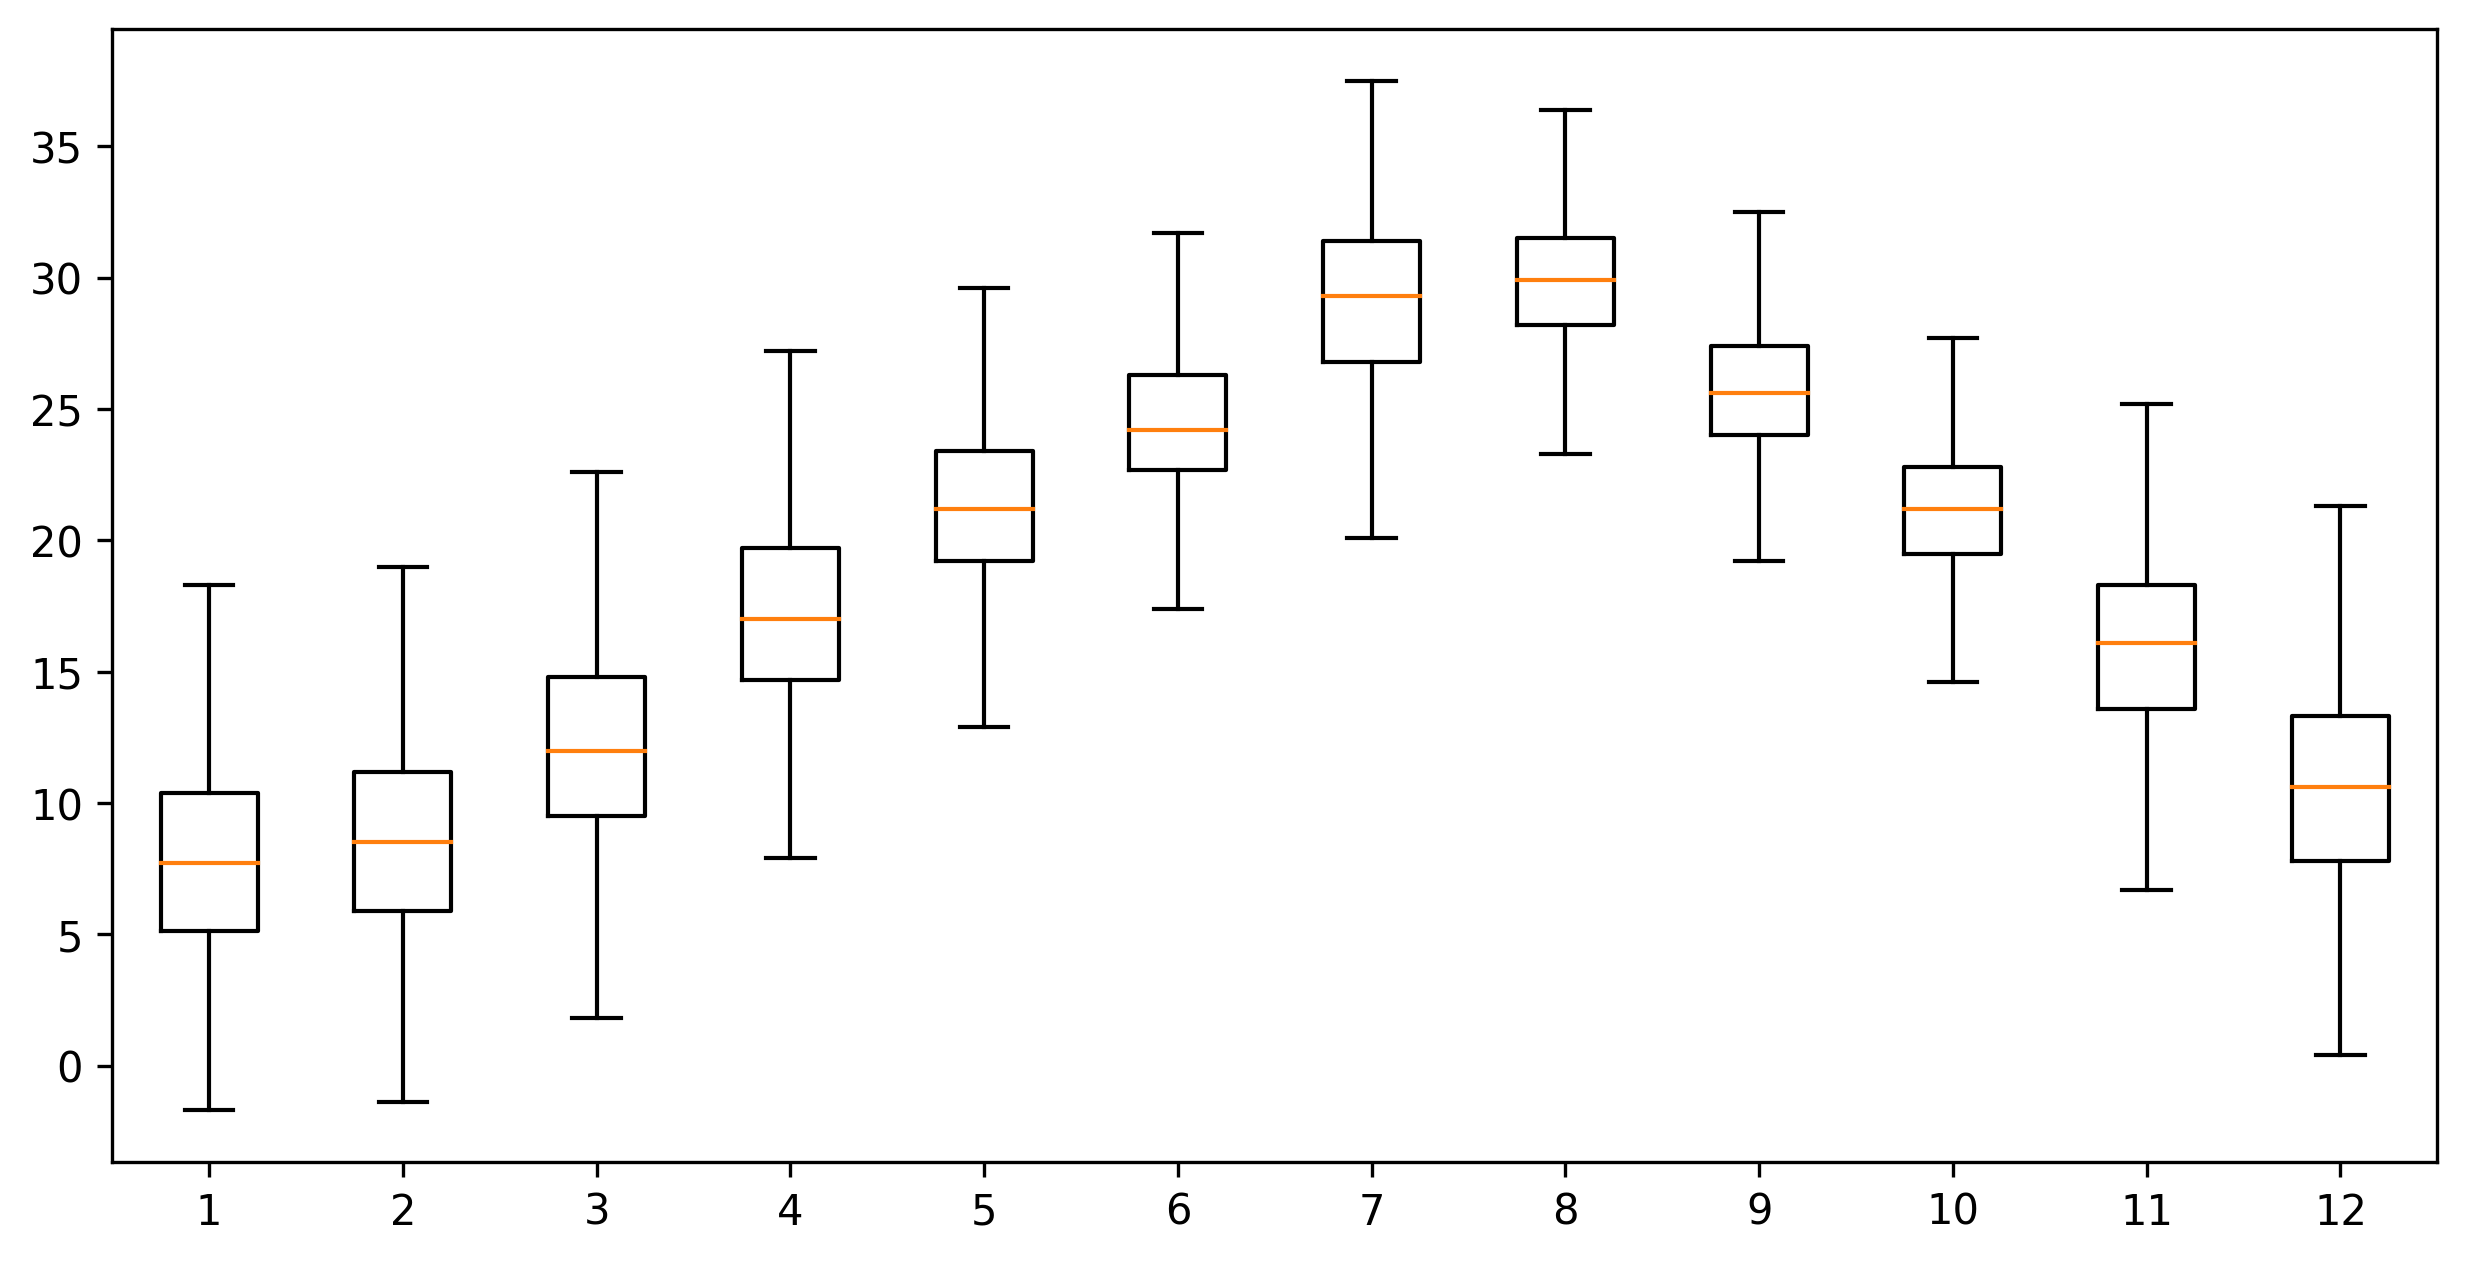

In [ ]:
import csv
import matplotlib.pyplot as plt


f = open('/content/jeju.csv', encoding = 'cp949')
data = csv.reader(f)
next(data)

month = [] #일별 데이터를 저장할 리스트 day 변수 선언
for i in range(12):
  month.append([])  # day 리스트 내에 12개 리스트 생성[[],[],[],[],[],[],[],[],[],[],[].......]

for row in data:
  if row[-1] != '':
    month[int(row[0].split('-')[1])-1].append(float(row[-1])) #월과 같은 번호의 인덱스에 월별 데이터 저장


plt.figure(figsize=(10,5), dpi=300) #피겨 사이즈 늘림
plt.boxplot(month, showfliers=False) #아웃라이어(이상치) 값 생략
plt.show()

4) 특정 달의 일별 최고 기온 상자 그림 그리기


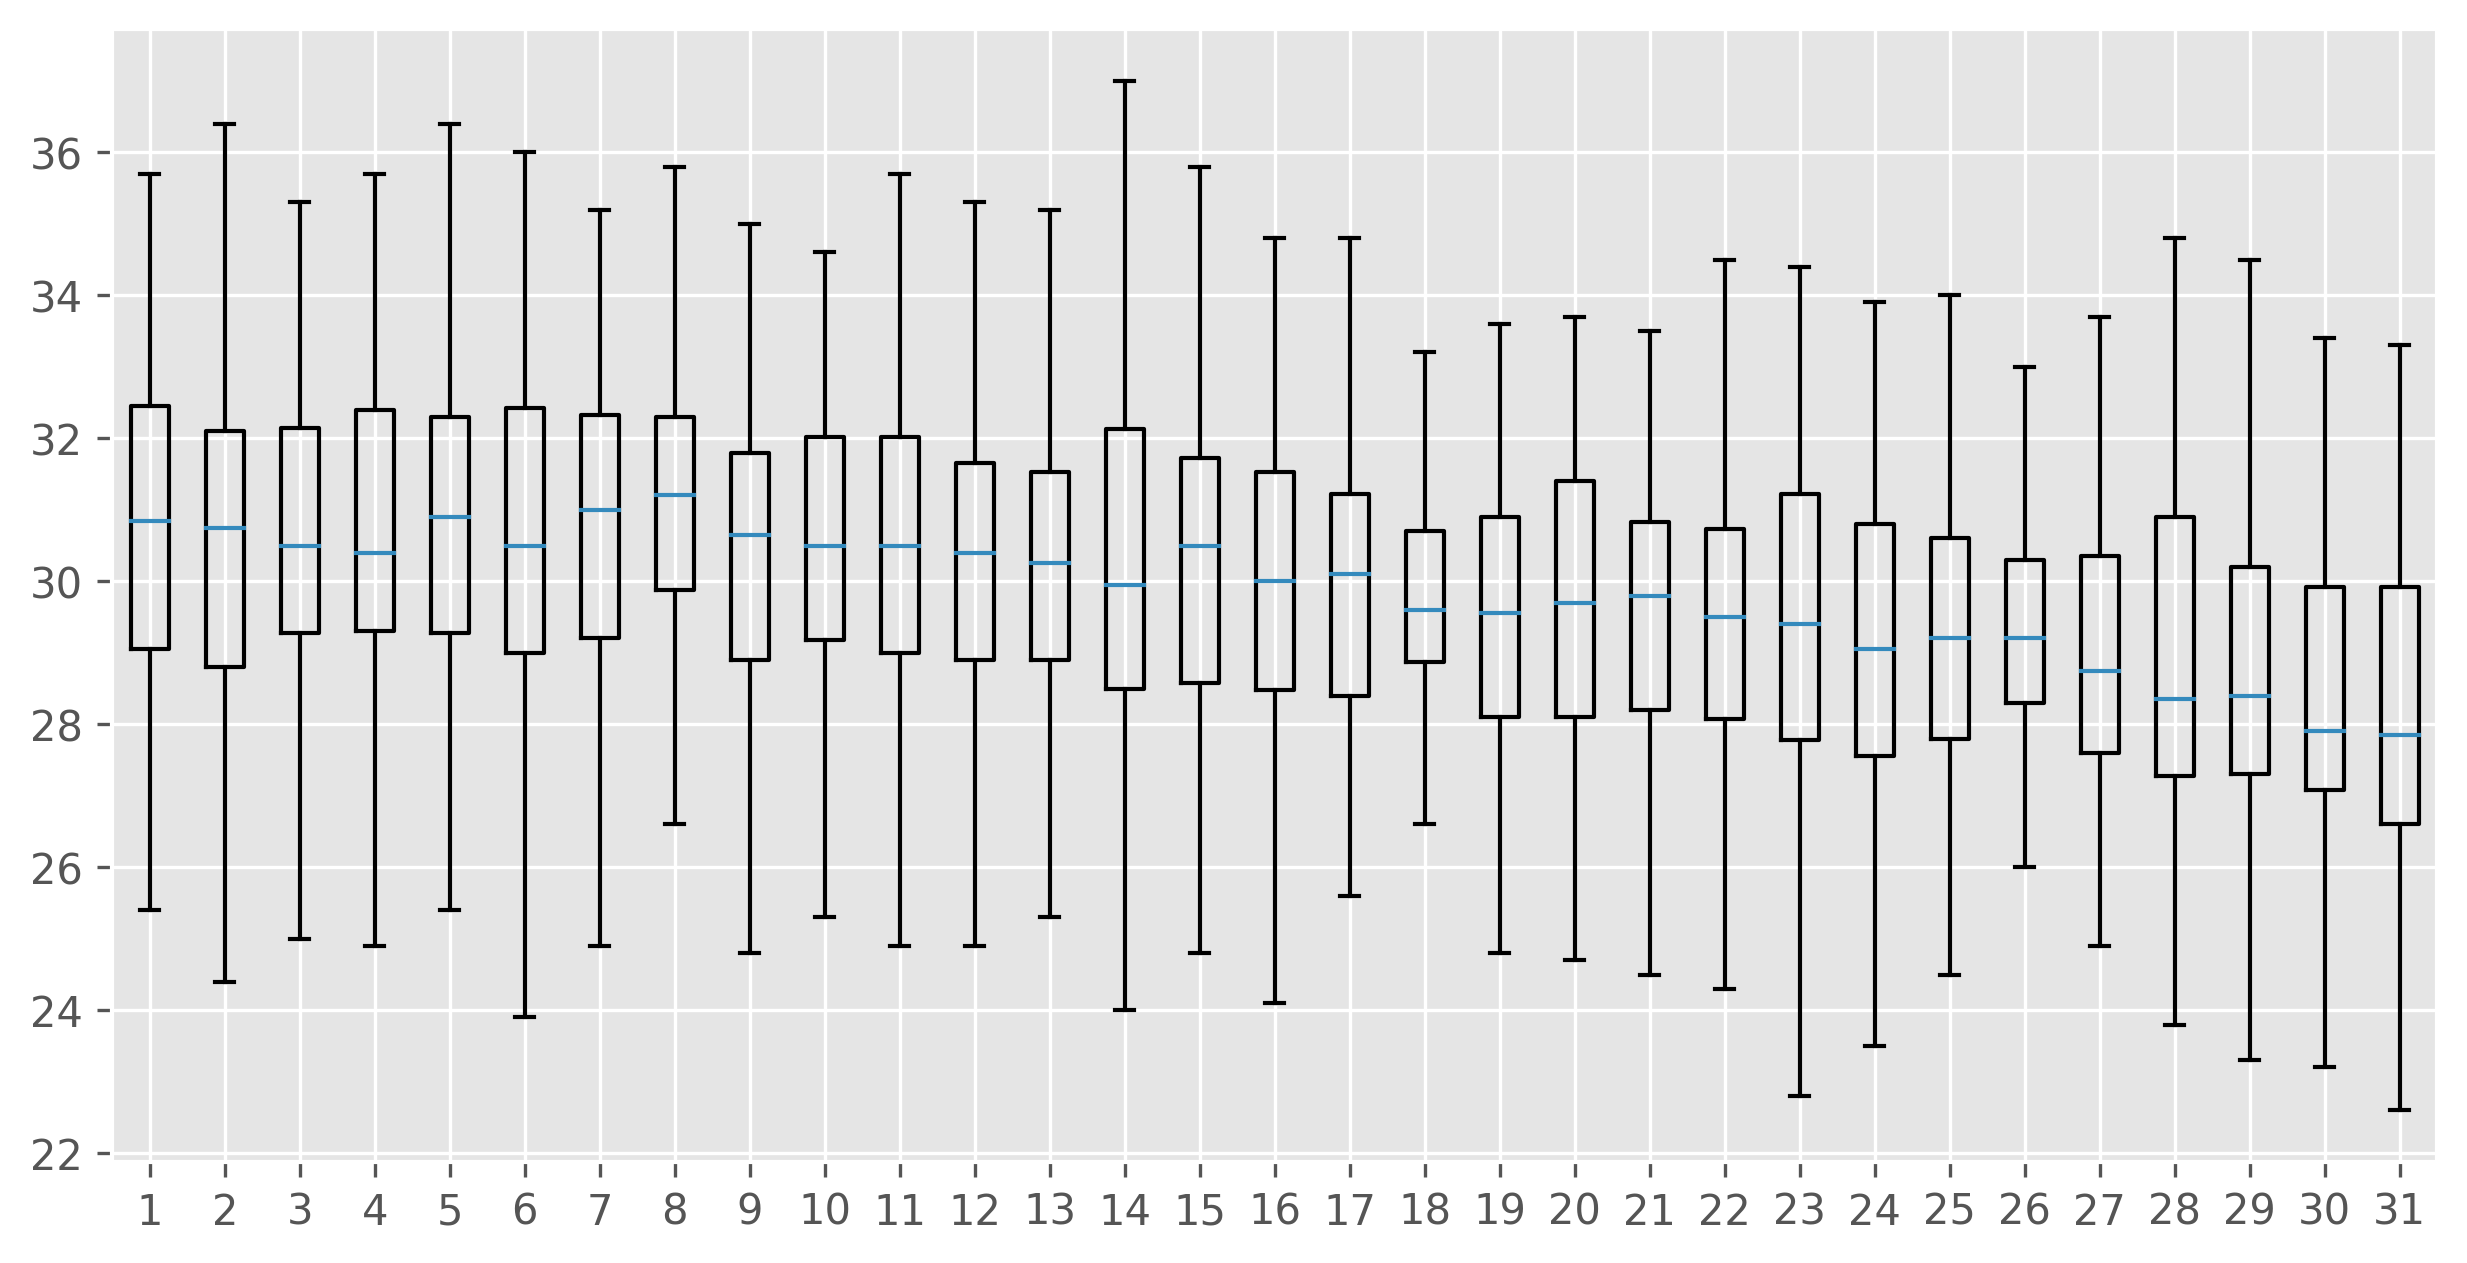

In [ ]:
import csv
import matplotlib.pyplot as plt


f = open('/content/jeju.csv', encoding = 'cp949')
data = csv.reader(f)
next(data)

day = [] #일별 데이터를 저장할 리스트 day 변수 선언
for i in range(31):
  day.append([])  # day 리스트 내에 31개 리스트 생성[[],[],[],[],[],[],[],[],[],[],[].......]

for row in data:
  if row[-1] != '':
    if row[0].split('-')[1] == '08':
      day[int(row[0].split('-')[2])-1].append(float(row[-1])) # 8월 최고 기온 값 저장 day[0] -> 1일


plt.style.use('ggplot') # 그래프 스타일 지정 (회색 배경의 격자무늬, 2/4 값을 의미하는 선의 색 변경)
plt.figure(figsize=(10,5), dpi=300) #피겨 사이즈 늘림
plt.boxplot(day, showfliers=False) #아웃라이어(이상치) 값 생략
plt.show()